In [1]:
# 기존 cv2 제거
!pip uninstall -y opencv-python

# 새로 설치 (headless 버전 - GUI 관련 의존성 없음)
!pip uninstall -y opencv-python opencv-python-headless
!pip install opencv-python-headless

# 필요한 모든 패키지 설치
!pip install numpy pandas matplotlib seaborn pygwalker squarify Pillow opencv-python-headless

Found existing installation: opencv-python-headless 4.11.0.86
Uninstalling opencv-python-headless-4.11.0.86:
  Successfully uninstalled opencv-python-headless-4.11.0.86
  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/dd/5c/c139a7876099916879609372bfa513b7f1257f7f1a908b0bdc1c2328241b/opencv_python_headless-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (50.0 MB)


In [2]:
# OpenCV 관련 라이브러리 설치
!apt-get update
!apt-get install -y libgl1-mesa-glx

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
import seaborn as sns
import pygwalker as pyg
import squarify
from PIL import Image
import cv2
from collections import Counter
import re

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists... Done                         
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-glx is already the newest version (21.2.6-0ubuntu0.1~20.04.2).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 12453 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20190410+repack1-2_all.deb ...
Unpacking fonts-noto-cjk (1:20190410+repack1-2) ...
Setting up fonts-noto-cjk (1:20190410+repack1-2) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
/tmp/ipykernel_19774/1269650679.py:18: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_19774/1269650679.py:18: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_19774/1269650679.py:18: UserWarning: Glyph 54256 (\N{HANGUL SYLLABLE PON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_19774/1269650679.py:18: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missin

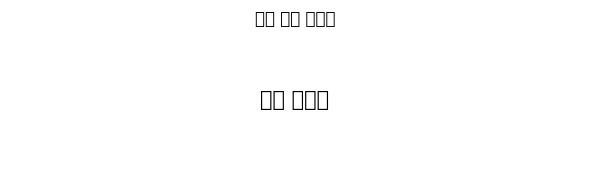

In [8]:
# 나눔고딕 폰트 직접 다운로드 및 설치
!apt-get update -qq
!apt-get install -y fonts-noto-cjk -qq

# 한글 폰트 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 폰트 직접 지정 (캐시 재구성 없이)
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams['axes.unicode_minus'] = False

# 테스트
plt.figure(figsize=(6, 2))
plt.text(0.5, 0.5, '한글 테스트', fontsize=15, ha='center')
plt.title('한글 폰트 테스트')
plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# 필수 패키지 및 폰트 설치
!apt-get update -qq
!apt-get install -y fontconfig fonts-nanum -qq

# 폰트 캐시 업데이트
!fc-cache -fv

# 폰트 설정 및 테스트
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import os

# 폰트 매니저 재구성 (_rebuild 대신 현재 버전에 맞는 방법 사용)
# matplotlib 버전에 따라 다른 방법 사용
try:
    fm.fontManager.findfont('NanumGothic')  # 폰트 캐시 갱신 시도
except:
    # 폰트 캐시 수동 갱신
    fm._load_fontmanager()

# 나눔고딕 폰트 경로 확인
font_locations = [
    '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    '/usr/share/fonts/nanum/NanumGothic.ttf',
    '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
]

# 사용 가능한 폰트 중 나눔고딕 검색
font_found = False
for font_path in font_locations:
    if os.path.exists(font_path):
        print(f"폰트 파일 발견: {font_path}")
        plt.rcParams['font.family'] = 'NanumGothic'
        plt.rcParams['axes.unicode_minus'] = False
        font_found = True
        break

# 폰트를 못 찾았을 경우 대체 방법
if not font_found:
    print("나눔고딕 폰트를 찾을 수 없어 다른 방법 시도...")
    
    # 시스템에 설치된 모든 폰트 확인
    fonts = [f.name for f in fm.fontManager.ttflist]
    for font in fonts:
        if 'Nanum' in font or '나눔' in font:
            print(f"발견된 나눔 계열 폰트: {font}")
            plt.rcParams['font.family'] = font
            plt.rcParams['axes.unicode_minus'] = False
            font_found = True
            break
    
    # 시스템 폰트 중 한글 지원 폰트 찾기
    if not font_found:
        print("대체 한글 폰트 검색 중...")
        for font in fonts:
            try:
                if any(ord(c) > 127 for c in font):
                    print(f"한글 지원 가능 폰트: {font}")
                    plt.rcParams['font.family'] = font
                    plt.rcParams['axes.unicode_minus'] = False
                    font_found = True
                    break
            except:
                continue
    
    # 그래도 못 찾으면 기본 폰트 사용
    if not font_found:
        print("한글 폰트를 찾을 수 없어 기본 폰트를 사용합니다")
        plt.rcParams['font.family'] = 'DejaVu Sans'
        plt.rcParams['axes.unicode_minus'] = False

# 테스트 그래프# 나눔고딕 폰트 직접 다운로드 및 설치
!mkdir -p ~/.fonts
!wget -q "https://github.com/naver/d2codingfont/releases/download/VER1.3.2/D2Coding-Ver1.3.2-20180524.zip"
!unzip -q -o D2Coding-Ver1.3.2-20180524.zip -d ~/.fonts/
!rm D2Coding-Ver1.3.2-20180524.zip

# 설치된 폰트 경로 확인 (D2 코딩 폰트는 한글 지원)
import os
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# matplotlib 폰트 캐시 완전 초기화
import matplotlib as mpl
mpl.font_manager._rebuild()

# 다운로드한 폰트 파일 직접 등록
font_path = os.path.expanduser('~/.fonts/D2Coding/D2Coding-Ver1.3.2-20180524.ttf')
if os.path.exists(font_path):
    print(f"폰트 파일 존재: {font_path}")
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
else:
    print(f"폰트 파일을 찾을 수 없습니다: {font_path}")
    # 시스템에서 사용 가능한 폰트 확인
    all_fonts = [f.name for f in fm.fontManager.ttflist]
    print(f"사용 가능한 폰트 수: {len(all_fonts)}")
    print("일부 폰트:", all_fonts[:5])

# 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 테스트
plt.figure(figsize=(6, 2))
plt.text(0.5, 0.5, '한글 테스트', fontsize=15, ha='center')
plt.title('한글 폰트 테스트')
plt.axis('off')
plt.tight_layout()
plt.show()
plt.figure(figsize=(6, 2))
plt.text(0.5, 0.5, '한글 테스트', fontsize=15, ha='center')
plt.title('한글 폰트 테스트')
plt.axis('off')
plt.tight_layout()
plt.show()

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 6 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/data/ephemeral/home/.local/share/fonts: skipping, no such directory
/data/ephemeral/home/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/data/ephemeral/home/.cache/fontconfig: not cleaning non-existent cache directory
/data/ephemeral/home/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded
폰트 파일 발견: /usr/share/fonts/truetype/nanum/NanumGothic.ttf
/bin/bash: unzip: command 

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

In [ ]:
# 시스템 명령어로 폰트 설치 (Docker/Jupyter 환경)
!apt-get update -qq
!apt-get install -y fonts-nanum -qq

# matplotlib 버전 확인
import matplotlib as mpl
print(f"Matplotlib 버전: {mpl.__version__}")

# 한글 폰트 설정 (matplotlib 버전 호환성 문제 해결)
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import os

# 나눔 폰트 설치 경로 확인
!fc-list | grep -i nanum

# 폰트 캐시 재구성 (최신 방식으로 통일)
import matplotlib as mpl
# 폰트 경로 직접 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 일반적인 나눔고딕 경로
if os.path.exists(font_path):
    # 폰트 추가
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
else:
    # 시스템에 설치된 나눔 폰트 찾기
    nanum_fonts = [f for f in fm.findSystemFonts() if 'Nanum' in f]
    if nanum_fonts:
        font_prop = fm.FontProperties(fname=nanum_fonts[0])
        plt.rc('font', family=font_prop.get_name())
    else:
        print("나눔 폰트를 찾을 수 없습니다.")

# 한글 깨짐 방지 설정
plt.rcParams['axes.unicode_minus'] = False

# 설치된 폰트 확인
fonts = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
print("설치된 나눔 폰트:", fonts)

Matplotlib 버전: 3.10.1
/bin/bash: fc-list: command not found
설치된 나눔 폰트: []


In [4]:
# 데이터 경로 설정 
data_path = "/data/ephemeral/home/processed_data"

총 6833개의 JSON 파일을 분석합니다...


100%|██████████| 6833/6833 [00:00<00:00, 17697.79it/s]


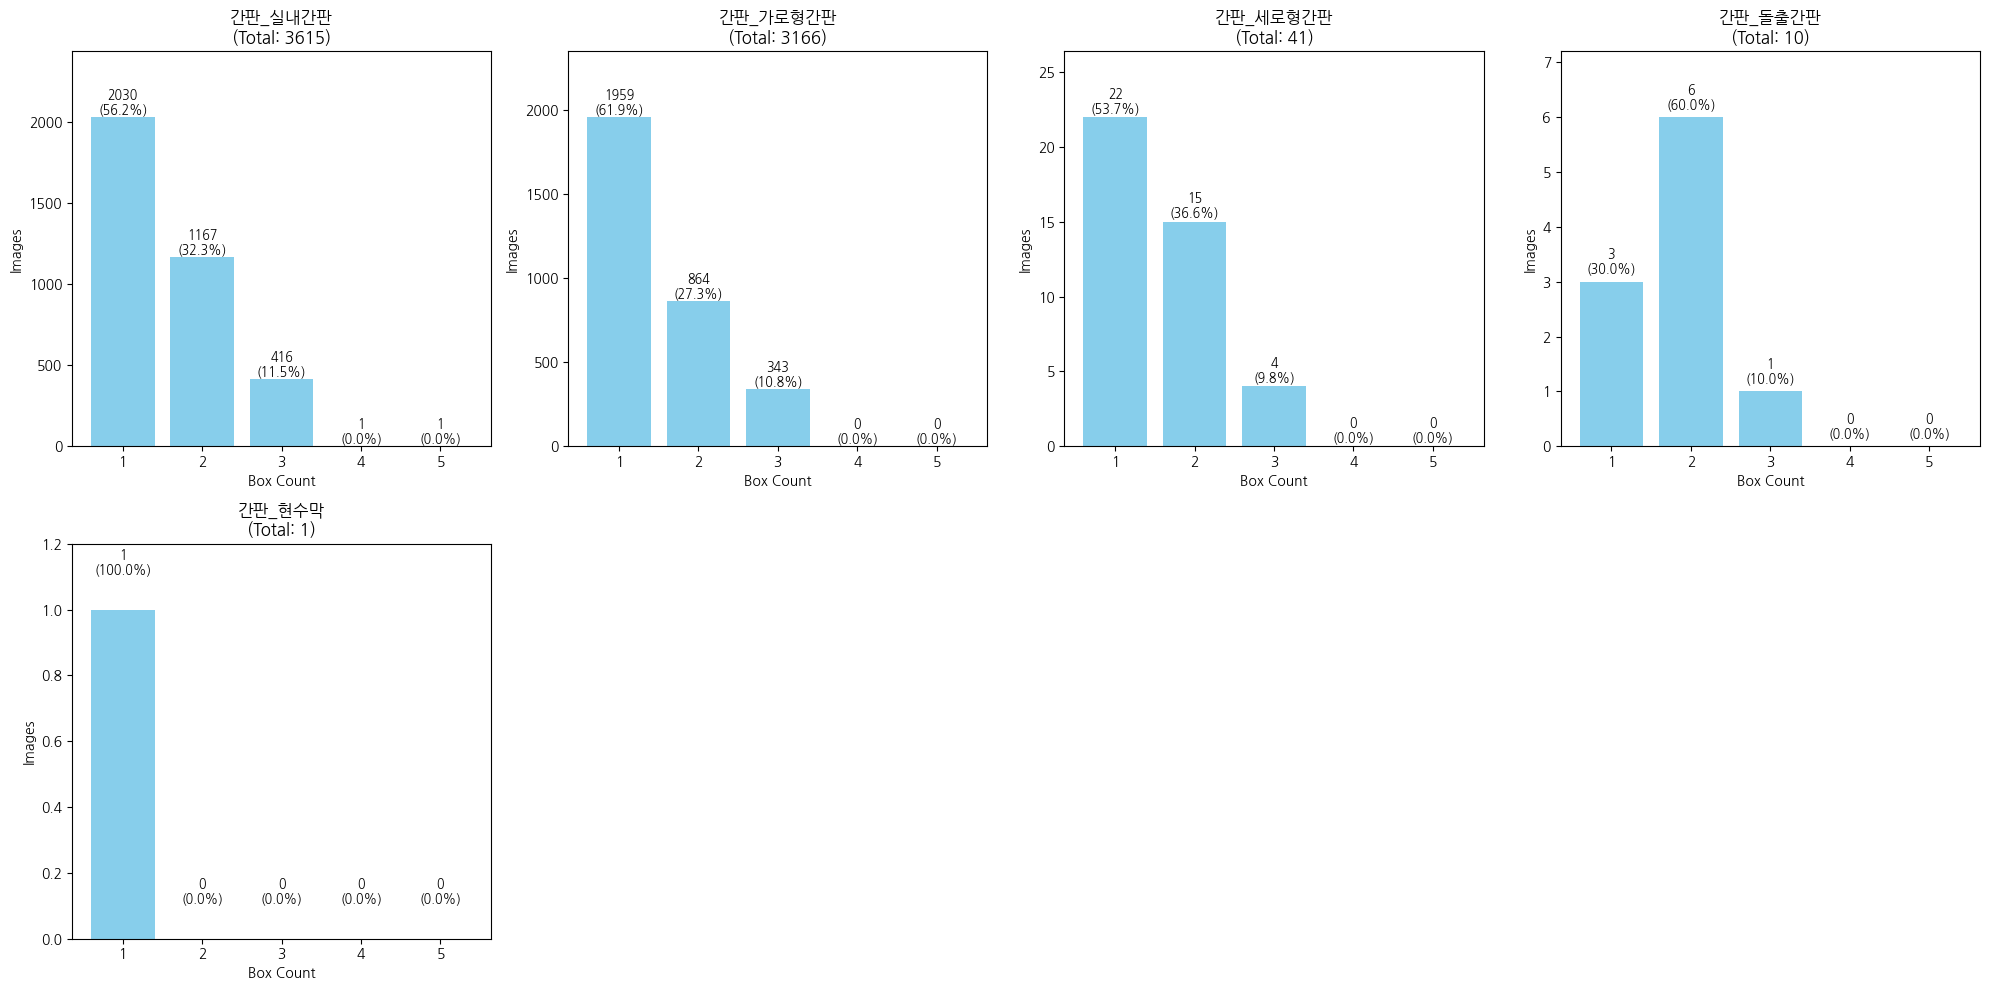


=== 카테고리별 이미지 수 ===
간판_실내간판: 3615개
간판_가로형간판: 3166개
간판_세로형간판: 41개
간판_돌출간판: 10개
간판_현수막: 1개

=== 바운딩 박스 수별 분포 요약 ===
    간판_실내간판  간판_가로형간판  간판_세로형간판  간판_돌출간판  간판_현수막
1개     2030      1959        22        3       1
2개     1167       864        15        6       0
3개      416       343         4        1       0
4개        1         0         0        0       0
5개        1         0         0        0       0


In [5]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm

def analyze_bbox_distribution_by_category():
    """
    카테고리별 바운딩 박스 수 분포 분석 및 시각화
    """
    # 정제된 데이터 경로
    data_path = "/data/ephemeral/home/processed_data"
    
    # 결과를 저장할 딕셔너리
    category_bbox_counts = defaultdict(lambda: defaultdict(int))
    category_totals = defaultdict(int)
    
    # 모든 JSON 파일 찾기
    json_files = []
    for root, _, files in os.walk(data_path):
        for file in files:
            if file.endswith('.json'):
                json_files.append(os.path.join(root, file))
    
    print(f"총 {len(json_files)}개의 JSON 파일을 분석합니다...")
    
    # 각 JSON 파일에서 카테고리와 바운딩 박스 수 추출
    for json_path in tqdm(json_files):
        try:
            # 카테고리 정보 추출 (디렉토리 경로에서)
            rel_path = os.path.relpath(json_path, data_path)
            path_parts = rel_path.split(os.sep)
            
            # TL1/1.간판/실내간판/xxx.json 형식에서 카테고리 추출
            if len(path_parts) >= 3:
                category = path_parts[1].split('.')[-1]  # '1.간판' -> '간판'
                sub_category = path_parts[2]  # '실내간판'
                # 카테고리와 하위 카테고리 조합
                full_category = f"{category}_{sub_category}"
            else:
                full_category = "기타"
            
            # JSON 파일 로드
            with open(json_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            # 바운딩 박스 수 계산
            bbox_count = 0
            
            # COCO 형식 확인
            if 'annotations' in data:
                bbox_count = len(data['annotations'])
            
            # LabelMe 형식 확인
            elif 'shapes' in data:
                bbox_count = len(data['shapes'])
            
            # 최대 5개까지만 카운트 (그래프의 x축과 일치시키기 위해)
            if bbox_count > 5:
                bbox_count = 5
            
            # 바운딩 박스 수에 따라 카테고리별 카운트 증가
            category_bbox_counts[full_category][bbox_count] += 1
            category_totals[full_category] += 1
                
        except Exception as e:
            print(f"파일 처리 중 오류: {json_path}, {str(e)}")
    
    # 결과를 DataFrame으로 변환
    categories = list(category_totals.keys())
    
    # 카테고리별 총 이미지 수에 따라 정렬
    categories.sort(key=lambda x: category_totals[x], reverse=True)
    
    # 카테고리별 바운딩 박스 분포 시각화
    plot_bbox_distribution(categories, category_bbox_counts, category_totals)
    
    return {
        'categories': categories,
        'bbox_counts': dict(category_bbox_counts),
        'totals': dict(category_totals)
    }

def plot_bbox_distribution(categories, category_bbox_counts, category_totals):
    """
    카테고리별 바운딩 박스 수 분포를 시각화합니다.
    """
    # 그래프 크기 및 레이아웃 설정
    n_categories = len(categories)
    n_cols = 4  # 한 행에 표시할 그래프 수
    n_rows = (n_categories + n_cols - 1) // n_cols  # 필요한 행 수 계산
    
    plt.figure(figsize=(20, 5 * n_rows))
    
    for i, category in enumerate(categories):
        ax = plt.subplot(n_rows, n_cols, i + 1)
        
        # 바운딩 박스 수 카운트 (1부터 5까지)
        counts = [category_bbox_counts[category].get(j, 0) for j in range(1, 6)]
        
        # 막대 그래프 생성
        bars = ax.bar(range(1, 6), counts, color='skyblue')
        
        # 각 막대 위에 값과 비율 표시
        for j, bar in enumerate(bars):
            height = bar.get_height()
            percentage = (height / category_totals[category]) * 100 if category_totals[category] > 0 else 0
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{int(height)}\n({percentage:.1f}%)',
                   ha='center', va='bottom', fontsize=9)
        
        # 그래프 제목 및 레이블 설정
        ax.set_title(f'{category}\n(Total: {category_totals[category]})')
        ax.set_xlabel('Box Count')
        ax.set_ylabel('Images')
        ax.set_xticks(range(1, 6))
        
        # y축 범위 설정 (가독성을 위해)
        max_count = max(counts) if counts else 0
        ax.set_ylim(0, max_count * 1.2)  # 최대값보다 20% 더 높게 설정
    
    plt.tight_layout()
    plt.show()
    
    # 요약 정보도 출력
    print("\n=== 카테고리별 이미지 수 ===")
    for category in categories:
        print(f"{category}: {category_totals[category]}개")
    
    print("\n=== 바운딩 박스 수별 분포 요약 ===")
    summary_df = pd.DataFrame({cat: [category_bbox_counts[cat].get(i, 0) for i in range(1, 6)] for cat in categories})
    summary_df.index = [f"{i}개" for i in range(1, 6)]
    print(summary_df)

# 함수 실행
distribution_data = analyze_bbox_distribution_by_category()